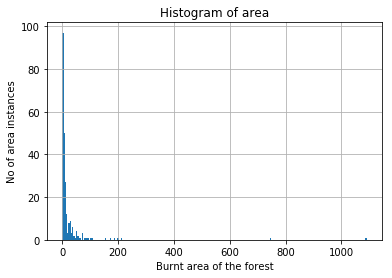

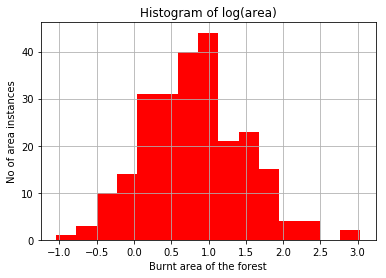

w*:
[ 2.11210487  2.81904658 -1.02898407  3.16160504  2.79333717 -0.02815015
  0.19612805 -0.03895839 -1.34555654  0.91209888 -0.69033134  1.08334664
 -2.24346366]
RSS:
103808.62852745803


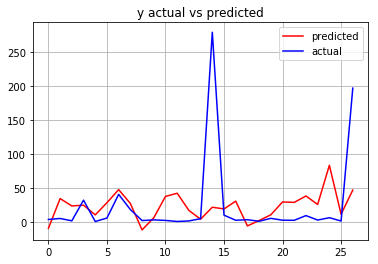

Correlation b/w actual and predicted outcome:
0.16517641133204233


In [99]:
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

train_data = genfromtxt('train.csv', delimiter=',')
train_data = train_data[1:]
train_data_burned = train_data[train_data[:,12] > 0]

test_data = genfromtxt('test.csv', delimiter=',')
test_data = test_data[1:]
test_data_burned = test_data[test_data[:,-1] > 0]

plt.figure(0)
plt.hist(train_data_burned[:,-1], bins='auto')
plt.xlabel('Burnt area of the forest')
plt.ylabel('No of area instances')
plt.title('Histogram of area')
plt.grid()
plt.show()

plt.figure(1)
plt.hist(np.log10(train_data_burned[:,-1]), bins='auto',color='r')
plt.xlabel('Burnt area of the forest')
plt.ylabel('No of area instances')
plt.title('Histogram of log(area)')
plt.grid()
plt.show()
#----c.i done

#train_data_burned[:,-1] = np.log10(train_data_burned[:,-1])
train_data_burned = np.insert(train_data_burned, 0, 1, axis=1)

y = train_data_burned[:,-1]
X = train_data_burned[:,:-1]

X_T = np.transpose(X)
X_TX = np.matmul(X_T, X)
inv = np.linalg.inv(X_TX)
t1 = np.matmul(inv, X_T)
w_star = np.matmul(t1, y)
print('w*:')
print(w_star)
#----c.ii done

#test_data_burned[:,-1] = np.log10(test_data_burned[:,-1])
test_data_burned = np.insert(test_data_burned, 0, 1, axis=1)
y_actual = test_data_burned[:,-1]
X_test = test_data_burned[:,:-1]
y_predicted = np.matmul(X_test, w_star)

RSS = np.matmul(np.transpose(y_actual-y_predicted), y_actual-y_predicted)
print('RSS:')
print(RSS)

plt.figure(2)
plt.plot(y_predicted, 'r', label='predicted')
plt.plot(y_actual, 'b', label='actual')
plt.title('y actual vs predicted')
plt.legend(loc='upper right')
plt.grid()
plt.show()

corr_coeff = np.corrcoef(y_actual, y_predicted)
print('Correlation b/w actual and predicted outcome:')
print(corr_coeff[0][-1])
#----c.iii done